In [2]:
import pandas as pd
import numpy as np

1 Series 

Key Points:
- ExtensionArray: The .array property returns the ExtensionArray of the data backing the Series or Index. For native NumPy types, it provides a thin wrapper around the numpy.ndarray. For other extension types (like Categorical, Period, etc.), it returns the actual array for that type.

- Difference from .values: .array is different from .values in that it doesn't necessarily copy the data or convert it to a different form. The .values method may return the data in a NumPy array format.

- Examples:
    - For a regular Series with NumPy native types (like int64), .array returns a NumpyExtensionArray.
    - For Series with extension types (like Categorical), .array returns the actual extension array, such as a - Categorical array.

In [2]:
cities = ["Kolkata", "Chicago", "Toronto", "Lisbon"]
populations = [14.85, 2.71, 2.93, 0.51]

In [3]:
series = pd.Series(cities,index= populations,dtype="category",name="cities")
series

14.85    Kolkata
2.71     Chicago
2.93     Toronto
0.51      Lisbon
Name: cities, dtype: category
Categories (4, object): ['Chicago', 'Kolkata', 'Lisbon', 'Toronto']

In [67]:
s = pd.Series([1, 2, 3, 4, 5])
s = pd.Series({"1": 1, "2": 2, "3": 3, "4": 4, "5": 5})
s = pd.Series((1, 2, 3, 4, 5))
print(s)

0    1
1    2
2    3
3    4
4    5
dtype: int64


In [68]:
print(s.array)

<NumpyExtensionArray>
[1, 2, 3, 4, 5]
Length: 5, dtype: int64


In [69]:
print(s.values)

[1 2 3 4 5]


In [75]:
"MohamedYasser".split()

['MohamedYasser']

In [21]:
pd.Series(list("MohamedYasser")).values

array(['M', 'o', 'h', 'a', 'm', 'e', 'd', 'Y', 'a', 's', 's', 'e', 'r'],
      dtype=object)

In [20]:
pd.Series(list("MohamedYasser")).astype("category").values

['M', 'o', 'h', 'a', 'm', ..., 'a', 's', 's', 'e', 'r']
Length: 13
Categories (10, object): ['M', 'Y', 'a', 'd', ..., 'm', 'o', 'r', 's']

In [23]:
s.dtype

dtype('int64')

In [24]:
s.shape

(5,)

In [5]:
arr = [
    [1, 2, 3, 4, 5],
    [6, 7, 8, 9, 10],
    [11, 12, 13, 14, 15]
]
series = pd.Series(arr)

In [39]:
series.ndim

1

In [6]:
series.size

3

In [7]:
print(series.shape)
series = series.T
print(series.shape)

(3,)
(3,)


In [45]:
print(series.memory_usage())
print(series.memory_usage(deep=True))
print(series.memory_usage(index=False))

156
468
24


In [47]:
series.hasnans

False

In [52]:
series = pd.Series({"a":[]})
series.empty

False

In [54]:
series = pd.Series({"a": [np.nan]})
series.empty

False

In [55]:
series = pd.Series()
series.empty

True

In [59]:
series.name

'cities'

In [9]:
df = pd.DataFrame([[1, 2], [3, 4], [5, 6]], columns=["Odd Numbers", "Even Numbers"])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Odd Numbers   3 non-null      int64
 1   Even Numbers  3 non-null      int64
dtypes: int64(2)
memory usage: 180.0 bytes


In [64]:
df.iloc[:,0].name

'Odd Numbers'

In [76]:
d = {"col1": [1, 2], "col2": [3, 4]}
df = pd.DataFrame(data=d)
print(df.dtypes)

col1    int64
col2    int64
dtype: object


In [77]:
df_cast = df.astype("int32")
print(df_cast.dtypes)

col1    int32
col2    int32
dtype: object


In [101]:
series = pd.Series([1,2,3,4,5,6])
print(series.dtype)
series = series.astype("int32")
print(series.dtype)
print("--"*20)
print(series.astype("int64", copy=True).add(10))
print(series)

int64
int32
----------------------------------------
0    11
1    12
2    13
3    14
4    15
5    16
dtype: int64
0    1
1    2
2    3
3    4
4    5
5    6
dtype: int32


In [ ]:
series = pd.Series([1,2,3,4,5,6],dtype="object")
print(series.dtype)
series = series.infer_objects()
print(series.dtype)

object
int64


copy()

The copy() method in pandas is used to create a duplicate of a Series object. This can be a deep copy (default) or a shallow copy, depending on the deep parameter.

In [15]:
# Deep Copy (Default)
s = pd.Series([1, 2], index=["a", "b"])
deep_copy = s.copy()

s["a"] = 100

print(s)
print(deep_copy)
print("-"*20)
print(s.memory_usage())
print(deep_copy.memory_usage())

a    100
b      2
dtype: int64
a    1
b    2
dtype: int64
--------------------
140
140


In [19]:
# Shallow Copy
s = pd.Series([1, 2], index=["a", "b"])
shallow_copy = s.copy(deep=False)

s["a"] = 1000000000  # Modify original Series

print(s)  # Original modified
print(shallow_copy)  # Shallow copy reflects changes
print("-" * 20)
print(s.memory_usage())
print(shallow_copy.memory_usage())

a    1000000000
b             2
dtype: int64
a    1000000000
b             2
dtype: int64
--------------------
140
140


In [7]:
s = pd.Series([[1, 2], [3, 4]])
deep_copy = s.copy()

s.iloc[0][0] = 100  # Modifying the original nested list

print(s)  # Original modified
print(deep_copy)  # Also modified!

0    [100, 2]
1      [3, 4]
dtype: object
0    [100, 2]
1      [3, 4]
dtype: object


In [8]:
import copy

deep_copy = copy.deepcopy(s)  # Now, a true deep copy!

In [ ]:
print(pd.Series([False]))
print(pd.Series([False]).bool())

0    False
dtype: bool
False


C:\Users\Mohamed Yasser\AppData\Local\Temp\ipykernel_9668\74684825.py:2: FutureWarning: Series.bool is now deprecated and will be removed in future version of pandas
  print(pd.Series([False]).bool()  )


In [23]:
ser = pd.Series(pd.Categorical(["a", "b", "a"]))
ser.to_numpy()

array(['a', 'b', 'a'], dtype=object)

In [25]:
ser = pd.Series(pd.date_range("2000", periods=2, tz="CET"))
ser.to_numpy()

array([Timestamp('2000-01-01 00:00:00+0100', tz='CET'),
       Timestamp('2000-01-02 00:00:00+0100', tz='CET')], dtype=object)

In [ ]:
ser = pd.Series([1, 2, 3])
np.asarray(ser)

In [28]:
idx = pd.DatetimeIndex(["2023", "2024", "2025"])
s = pd.Series([1, 2, 3], index=idx)
s = s.to_period()
print(s)

2023    1
2024    2
2025    3
Freq: Y-DEC, dtype: int64


In [29]:
s = pd.Series([1, 2, 3])
s.to_list()

[1, 2, 3]

In [30]:
s = pd.Series([1, 2, 3])
s.array

<NumpyExtensionArray>
[1, 2, 3]
Length: 3, dtype: int64

In [32]:
s = pd.Series([1, 2, 3])
s.values

array([1, 2, 3], dtype=int64)

In [13]:
df = pd.DataFrame(
    [
        [24.3, 75.7, "high"],
        [31, 87.8, "high"],
        [22, 71.6, "medium"],
        [35, 95, "medium"],
    ],
    columns=["temp_celsius", "temp_fahrenheit", "windspeed"],
    index=pd.date_range(start="2014-02-12", end="2014-02-15", freq="D"),
)

In [16]:
df.loc["2014-02-12", "windspeed"]

'high'

In [18]:
df["windspeed"]["2014-02-12"]

'high'

In [48]:
ser = df["windspeed"]
print(ser.get("2014-02-13"))
print(ser["2014-02-13"])

high
high


In [49]:
df = pd.DataFrame(
    [[0, 2, 3], [0, 4, 1], [10, 20, 30]], index=[4, 5, 6], columns=["A", "B", "C"]
)

In [ ]:
df.loc[4,"B"]
# loc [index, column]

2

In [52]:
df.at[4, "B"]

2

In [53]:
df.iat[1, 2]

1

In [22]:
df = pd.DataFrame(
    {
    "max_speed": [1, 4, 7],
    "shield": [2, 5, 8]
    },
    index=["cobra", "viper", "sidewinder"],
)

In [23]:
df.head()

,max_speed,shield
cobra,1,2
viper,4,5
sidewinder,7,8


In [24]:
df.loc["cobra"]

max_speed    1
shield       2
Name: cobra, dtype: int64

In [25]:
df.loc["cobra", "max_speed"]

1

In [26]:
df.loc[["viper", "sidewinder"]]

,max_speed,shield
viper,4,5
sidewinder,7,8


In [27]:
df.loc["cobra":"viper", "max_speed"]

cobra    1
viper    4
Name: max_speed, dtype: int64

In [28]:
df.loc[["viper", "sidewinder"], ["max_speed", "shield"]]

,max_speed,shield
viper,4,5
sidewinder,7,8


In [29]:
df.loc[df["shield"] > 6]

,max_speed,shield
sidewinder,7,8


In [31]:
df.loc[df["shield"] > 6, "shield"]

sidewinder    8
Name: shield, dtype: int64

In [70]:
df[df["shield"] > 6] [["max_speed"]]

,max_speed
viper,30
sidewinder,30


In [64]:
df.loc[(df["max_speed"] > 1) & (df["shield"] < 8)]

,max_speed,shield
viper,4,5


In [71]:
df.loc[(df["max_speed"] > 1) | (df["shield"] < 8)]

,max_speed,shield
cobra,30,2
viper,30,50
sidewinder,30,8


In [73]:
df.loc[df["shield"] > 6] += 30

In [65]:
df.loc["viper", "shield"] = 50

In [66]:
df.loc[:, "max_speed"] = 30

In [32]:
mydict = [
    {"a": 1, "b": 2, "c": 3, "d": 4},
    {"a": 100, "b": 200, "c": 300, "d": 400},
    {"a": 1000, "b": 2000, "c": 3000, "d": 4000},
]

df = pd.DataFrame(mydict)

In [33]:
df.head()

,a,b,c,d
0,1,2,3,4
1,100,200,300,400
2,1000,2000,3000,4000


In [34]:
df.iloc[0,0]

1

In [35]:
df.iloc[0].index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [36]:
df.iloc[0].values

array([1, 2, 3, 4], dtype=int64)

In [39]:
df.iloc[0:1,:]

,a,b,c,d
0,1,2,3,4


In [94]:
df.iloc[[0, 1]]

,a,b,c,d
0,1,2,3,4
1,100,200,300,400


In [100]:
df.iloc[:2]

,a,b,c,d
0,1,2,3,4
1,100,200,300,400


In [101]:
df.iloc[0, 1]

2

In [116]:
series = pd.Series([1, 2, 3, 4, 5])
for i in series:
    print(i)

1
2
3
4
5


In [106]:
for i,v in series.items():
    print(f"index{i} value {v}")

index0 value 1
index1 value 2
index2 value 3
index3 value 4
index4 value 5


In [109]:
series.keys

<bound method Series.keys of 0    1
1    2
2    3
3    4
4    5
dtype: int64>

In [111]:
series.values

array([1, 2, 3, 4, 5], dtype=int64)

In [117]:
series.pop(0)
print(series)

1    2
2    3
3    4
4    5
dtype: int64


In [119]:
import pandas as pd

data = {"num_legs": [4, 4, 2, 2], "num_wings": [0, 0, 2, 2]}

index = pd.MultiIndex.from_tuples(
    [
        ("mammal", "cat", "walks"),
        ("mammal", "dog", "walks"),
        ("mammal", "bat", "flies"),
        ("bird", "penguin", "walks"),
    ],
    names=["class", "animal", "locomotion"],
)

df = pd.DataFrame(data, index=index)

In [ ]:
print(df)

                           num_legs  num_wings
class  animal  locomotion                     
mammal cat     walks              4          0
       dog     walks              4          0
       bat     flies              2          2
bird   penguin walks              2          2


In [126]:
print(df.xs("mammal"))

                   num_legs  num_wings
animal locomotion                     
cat    walks              4          0
dog    walks              4          0
bat    flies              2          2


In [127]:
print(df.xs("cat", level="animal"))

                   num_legs  num_wings
class  locomotion                     
mammal walks              4          0


In [41]:
series = pd.Series([1,2,3,4,5])
series = series.add(10)
print(series)

0    11
1    12
2    13
3    14
4    15
dtype: int64


In [43]:
series = pd.Series([1, 2, 3, 4, 5])
series = series+10
print(series)

0    11
1    12
2    13
3    14
4    15
dtype: int64


In [134]:
series = pd.Series([1, 2, 3, 4, 5])
series = series.sub(10)
print(series)

0   -9
1   -8
2   -7
3   -6
4   -5
dtype: int64


In [135]:
series = pd.Series([1, 2, 3, 4, 5])
series = series.div(10)
print(series)

0    0.1
1    0.2
2    0.3
3    0.4
4    0.5
dtype: float64


In [ ]:
series_1 = pd.Series([1,2,3,4,5])
series_2 = pd.Series([1,2,3,4,5])

print(series_1 + series_2)
print(series_1 - series_2)
print(series_1 * series_2)
print(series_1 / series_2)
print(series_1 ** series_2)
print(series_1 % series_2)
print(series_1 // series_2)
print(series_1 & series_2)
print(series_1 | series_2)
print(series_1 ^ series_2)
print(series_1 > series_2)
print(series_1 < series_2)
print(series_1 >= series_2)
print(series_1 <= series_2)
print(series_1 == series_2)


In [137]:
series_1.dot(series_2)

55

apply() 

function allows you to apply a function (either a built-in function, a NumPy function, or a custom Python function) to each element in a Pandas Series. This is useful for element-wise transformations.

How apply() Works
- apply() applies a given function to each element of the Series. The function can be:
    - A Python function
    - A NumPy universal function (ufunc)
    - A lambda function (anonymous function)

### Parameters:

- func (function) → The function to apply to each element of the Series.
    - convert_dtype (bool, default=True, deprecated in pandas 2.1.0)
    If True, pandas tries to automatically determine a better data type for the result.
    If False, results are kept as object dtype.
    Deprecated: Instead of convert_dtype=False, use ser.astype(object).apply().

- args (tuple) → Additional positional arguments to pass to the function.
- by_row (False or "compat", default="compat")
    "compat" (default): The function is applied element-wise (like Series.map()).
    False: The function receives the entire Series at once.
    New in pandas 2.1.0
- kwargs (dict) → Additional keyword arguments passed to the function.

In [139]:
s = pd.Series([20, 21, 12], index=["London", "New York", "Helsinki"])

In [141]:
s = s ** 2
s

London      160000
New York    194481
Helsinki     20736
dtype: int64

In [143]:
def square(x):
    return x**2

s.apply(square)

London      25600000000
New York    37822859361
Helsinki      429981696
dtype: int64

In [142]:
s.apply(lambda x : x**2)

London      25600000000
New York    37822859361
Helsinki      429981696
dtype: int64

In [ ]:
def subtract_custom_value(x, custom_value):
    return x - custom_value

s.apply(subtract_custom_value, args=(5,))

London      159995
New York    194476
Helsinki     20731
dtype: int64

In [48]:
s = pd.Series([2,4,6,8,10])

def add_custom_values(x, **kwargs):
    for month in kwargs:
        x += kwargs[month]
    return x

s.apply(add_custom_values, june=30, july=20, august=25)

0    77
1    79
2    81
3    83
4    85
dtype: int64

In [146]:
import numpy as np

s.apply(np.log)

London      11.982929
New York    12.178090
Helsinki     9.939627
dtype: float64

agg

<dd class="field-odd"><dl>
<dt><strong>func</strong><span class="classifier">function, str, list or dict</span></dt><dd><p>Function to use for aggregating the data. If a function, must either
work when passed a Series or when passed to Series.apply.</p>
<p>Accepted combinations are:</p>
<ul class="simple">
<li><p>function</p></li>
<li><p>string function name</p></li>
<li><p>list of functions and/or function names, e.g. <code class="docutils literal notranslate"><span class="pre">[np.sum,</span> <span class="pre">'mean']</span></code></p></li>
<li><p>dict of axis labels -&gt; functions, function names or list of such.</p></li>
</ul>
</dd>
<dt><strong>axis</strong><span class="classifier">{0 or ‘index’}</span></dt><dd><p>Unused. Parameter needed for compatibility with DataFrame.</p>
</dd>
<dt><strong>*args</strong></dt><dd><p>Positional arguments to pass to <cite>func</cite>.</p>
</dd>
<dt><strong>**kwargs</strong></dt><dd><p>Keyword arguments to pass to <cite>func</cite>.</p>
</dd>
</dl>
</dd>

In [49]:
s = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [55]:
print(s.agg("min"))
print(s.agg("max"))
print(s.agg("mean"))
print(s.agg("sum"))
print(s.agg("std"))
print(s.agg("var"))
print(s.agg("skew"))
print(s.agg("kurt"))
print(s.agg("median"))
print(s.agg("nunique"))

1
10
5.5
55
3.0276503540974917
9.166666666666666
0.0
-1.2000000000000002
5.5
10


In [56]:
s.agg(["min","max"])

min     1
max    10
dtype: int64

In [57]:
s.agg(lambda x: x.max() - x.min())

9

In [58]:
df = pd.DataFrame(
    {
        "A":range(1, 11),
        "B":range(11, 21),
        "C":range(21, 31)
    }
)
df.head()

,A,B,C
0,1,11,21
1,2,12,22
2,3,13,23
3,4,14,24
4,5,15,25


In [59]:
df.agg({'A':['sum','mean'],'B':['min','max']})

,A,B
sum,55.0,NaN
mean,5.5,NaN
min,NaN,11.0
max,NaN,20.0


transform

<dl class="field-list">
<dt class="field-odd">Parameters<span class="colon">:</span></dt>
<dd class="field-odd"><dl>
<dt><strong>func</strong><span class="classifier">function, str, list-like or dict-like</span></dt><dd><p>Function to use for transforming the data. If a function, must either
work when passed a Series or when passed to Series.apply. If func
is both list-like and dict-like, dict-like behavior takes precedence.</p>
<p>Accepted combinations are:</p>
<ul class="simple">
<li><p>function</p></li>
<li><p>string function name</p></li>
<li><p>list-like of functions and/or function names, e.g. <code class="docutils literal notranslate"><span class="pre">[np.exp,</span> <span class="pre">'sqrt']</span></code></p></li>
<li><p>dict-like of axis labels -&gt; functions, function names or list-like of such.</p></li>
</ul>
</dd>
<dt><strong>axis</strong><span class="classifier">{0 or ‘index’}</span></dt><dd><p>Unused. Parameter needed for compatibility with DataFrame.</p>
</dd>
<dt><strong>*args</strong></dt><dd><p>Positional arguments to pass to <cite>func</cite>.</p>
</dd>
<dt><strong>**kwargs</strong></dt><dd><p>Keyword arguments to pass to <cite>func</cite>.</p>
</dd>
</dl>
</dd>
<dt class="field-even">Returns<span class="colon">:</span></dt>
<dd class="field-even"><dl class="simple">
<dt>Series</dt><dd><p>A Series that must have the same length as self.</p>
</dd>
</dl>
</dd>
<dt class="field-odd">Raises<span class="colon">:</span></dt>
<dd class="field-odd"><dl class="simple">
<dt><strong>ValueError</strong><span class="classifier">If the returned Series has a different length than self.</span></dt><dd></dd>
</dl>
</dd>
</dl>

In [60]:
s = pd.Series([1, 2, 3, 4])

# Apply a function that squares each value
result = s.transform(lambda x: x**2)
print(result)

0     1
1     4
2     9
3    16
dtype: int64


In [61]:
s.transform("sqrt")  # Computes square root

0    1.000000
1    1.414214
2    1.732051
3    2.000000
dtype: float64

In [64]:
import numpy as np

s.transform([np.sqrt, np.exp])

,sqrt,exp
0,1.000000,2.718282
1,1.414214,7.389056
2,1.732051,20.085537
3,2.000000,54.598150


In [95]:
df = pd.DataFrame(
    {
        "Date": ["2024-03-01", "2024-03-01", "2024-03-02", "2024-03-02"],
        "Data": [10, 20, 30, 40],
    
    }
)

df

,Date,Data
0,2024-03-01,10
1,2024-03-01,20
2,2024-03-02,30
3,2024-03-02,40


In [ ]:
df.groupby("Date")["Data"].sum()

Date
2024-03-01    30
2024-03-02    70
Name: Data, dtype: int64

In [136]:
df["Total"] = list(range(df.shape[0]))

In [ ]:
for i in df.index:
    if df.iloc[i,0] == "2024-03-01":
        df.iloc[i, 2] = "30"
    else:
        df.iloc[i, 2] = "70"

In [135]:
df.head()

,Date,Data,Total
0,2024-03-01,10,70
1,2024-03-01,20,70
2,2024-03-02,30,30
3,2024-03-02,40,30


In [81]:
df["Total"] = df.groupby("Date")["Data"].transform("sum")
print(df)

         Date  Data  Total
0  2024-03-01    10     30
1  2024-03-01    20     30
2  2024-03-02    30     70
3  2024-03-02    40     70


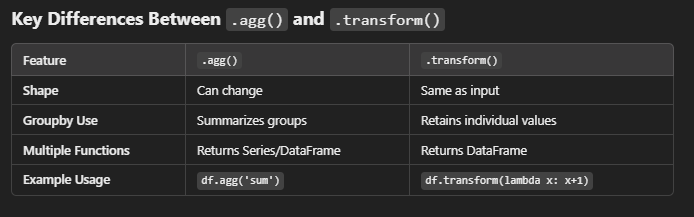

map

Parameters:
- function, collections.abc.Mapping subclass or Series
Mapping correspondence.

- na_action
{None, ‘ignore’}, default None
If ‘ignore’, propagate NaN values, without passing them to the mapping correspondence.

In [138]:
animal = pd.Series(["cat", "dog", "rabbit"])

animal_upper = animal.map(str.upper)
print(animal_upper)

0       CAT
1       DOG
2    RABBIT
dtype: object


In [ ]:
s = pd.Series(["cat", "dog", "rabbit"])

s_sentence = s.map(lambda x: f"I am a {x}")
print(s_sentence)

0       I am a cat
1       I am a dog
2    I am a rabbit
dtype: object


In [ ]:
s = pd.Series(["cat", "dog", np.nan, "rabbit"])

s_mapped = s.map(lambda x: f"I am a {x}", na_action="ignore")
print(s_mapped)

0       I am a cat
1       I am a dog
2              NaN
3    I am a rabbit
dtype: object


In [193]:
df = pd.DataFrame(
    {
        "Order_ID": [101, 102, 103, 104, 105],
        "Customer_Name": ["Alice", "Bob", "Charlie", "David", "Emma"],
        "Category_Code": [1, 2, 3, 1, 3],
    }
)

In [194]:
df.head()

,Order_ID,Customer_Name,Category_Code
0,101,Alice,1
1,102,Bob,2
2,103,Charlie,3
3,104,David,1
4,105,Emma,3


In [197]:
df["Category_one"] = df["Category_Code"].map(lambda x :1 if x == 1 else 0)
df["Category_two"] = df["Category_Code"].map(lambda x :1 if x == 2 else 0)
df["Category_three"] = df["Category_Code"].map(lambda x :1 if x == 3 else 0)
df["Category_four"] = df["Category_Code"].map(lambda x :1 if x == 4 else 0)

In [198]:
df.head()

,Order_ID,Customer_Name,Category_Code,Category_one,Category_two,Category_three,Category_four
0,101,Alice,1,1,0,0,0
1,102,Bob,2,0,1,0,0
2,103,Charlie,3,0,0,1,0
3,104,David,1,1,0,0,0
4,105,Emma,3,0,0,1,0


In [ ]:
def get_category_name(code):
    if code == 1:
        return "Electronics"
    elif code == 2:
        return "Clothing"
    elif code == 3:
        return "Books"
    else:
        return "Unknown"

df["Category_Code"] = df["Category_Code"].apply(get_category_name)

In [192]:
df.head()

,Order_ID,Customer_Name,Category_Code,Category_one
0,101,Alice,1,1
1,102,Bob,2,0
2,103,Charlie,3,0
3,104,David,1,1
4,105,Emma,3,0


In [181]:
def get_category_name(code):
    if code == 1:
        return "Electronics"
    elif code == 2:
        return "Clothing"
    elif code == 3:
        return "Books"
    else:
        return "Unknown"
    
df["Category_Name"] = df["Category_Code"].map(get_category_name)    

In [176]:
df.head()

,Order_ID,Customer_Name,Category_Code,Category_Name
0,101,Alice,1,Electronics
1,102,Bob,2,Clothing
2,103,Charlie,3,Books
3,104,David,1,Electronics
4,105,Emma,3,Books


In [182]:
df = pd.DataFrame(
    {"Order_ID": [101, 102, 103, 104, 105], "Category_Code": [1, 2, 3, 1, 3]}
)

# Mapping dictionary
category_mapping = {1: "Electronics", 2: "Clothing", 3: "Furniture"}

# Using map() to replace category codes with names
df["Category_Name"] = df["Category_Code"].map(category_mapping)

print(df)

   Order_ID  Category_Code Category_Name
0       101              1   Electronics
1       102              2      Clothing
2       103              3     Furniture
3       104              1   Electronics
4       105              3     Furniture


In [183]:
df = pd.DataFrame({"Price": [100, 200, 300, 400]})

# Using map() to apply a function
df["Price_After_Tax"] = df["Price"].map(lambda x: x * 1.1)

print(df)

   Price  Price_After_Tax
0    100            110.0
1    200            220.0
2    300            330.0
3    400            440.0


In [184]:
df = pd.DataFrame({"Price": [100, 200, 300, 400], "Tax": [10, 20, 30, 40]})

# Use apply() for row-wise operations
df["Total"] = df.apply(lambda row: row["Price"] + row["Tax"], axis=1)

print(df)

   Price  Tax  Total
0    100   10    110
1    200   20    220
2    300   30    330
3    400   40    440


group by 

<dl class="field-list">
<dt class="field-odd">Parameters<span class="colon">:</span></dt>
<dd class="field-odd"><dl>
<dt><strong>by</strong><span class="classifier">mapping, function, label, pd.Grouper or list of such</span></dt><dd><p>Used to determine the groups for the groupby.
If <code class="docutils literal notranslate"><span class="pre">by</span></code> is a function, it’s called on each value of the object’s
index. If a dict or Series is passed, the Series or dict VALUES
will be used to determine the groups (the Series’ values are first
aligned; see <code class="docutils literal notranslate"><span class="pre">.align()</span></code> method). If a list or ndarray of length
equal to the selected axis is passed (see the <a class="reference external" href="https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#splitting-an-object-into-groups">groupby user guide</a>),
the values are used as-is to determine the groups. A label or list
of labels may be passed to group by the columns in <code class="docutils literal notranslate"><span class="pre">self</span></code>.
Notice that a tuple is interpreted as a (single) key.</p>
</dd>
<dt><strong>axis</strong><span class="classifier">{0 or ‘index’, 1 or ‘columns’}, default 0</span></dt><dd><p>Split along rows (0) or columns (1). For <cite>Series</cite> this parameter
is unused and defaults to 0.</p>
<div class="deprecated">
<p><span class="versionmodified deprecated">Deprecated since version 2.1.0: </span>Will be removed and behave like axis=0 in a future version.
For <code class="docutils literal notranslate"><span class="pre">axis=1</span></code>, do <code class="docutils literal notranslate"><span class="pre">frame.T.groupby(...)</span></code> instead.</p>
</div>
</dd>
<dt><strong>level</strong><span class="classifier">int, level name, or sequence of such, default None</span></dt><dd><p>If the axis is a MultiIndex (hierarchical), group by a particular
level or levels. Do not specify both <code class="docutils literal notranslate"><span class="pre">by</span></code> and <code class="docutils literal notranslate"><span class="pre">level</span></code>.</p>
</dd>
<dt><strong>as_index</strong><span class="classifier">bool, default True</span></dt><dd><p>Return object with group labels as the
index. Only relevant for DataFrame input. as_index=False is
effectively “SQL-style” grouped output. This argument has no effect
on filtrations (see the <a class="reference external" href="https://pandas.pydata.org/docs/dev/user_guide/groupby.html#filtration">filtrations in the user guide</a>),
such as <code class="docutils literal notranslate"><span class="pre">head()</span></code>, <code class="docutils literal notranslate"><span class="pre">tail()</span></code>, <code class="docutils literal notranslate"><span class="pre">nth()</span></code> and in transformations
(see the <a class="reference external" href="https://pandas.pydata.org/docs/dev/user_guide/groupby.html#transformation">transformations in the user guide</a>).</p>
</dd>
<dt><strong>sort</strong><span class="classifier">bool, default True</span></dt><dd><p>Sort group keys. Get better performance by turning this off.
Note this does not influence the order of observations within each
group. Groupby preserves the order of rows within each group. If False,
the groups will appear in the same order as they did in the original DataFrame.
This argument has no effect on filtrations (see the <a class="reference external" href="https://pandas.pydata.org/docs/dev/user_guide/groupby.html#filtration">filtrations in the user guide</a>),
such as <code class="docutils literal notranslate"><span class="pre">head()</span></code>, <code class="docutils literal notranslate"><span class="pre">tail()</span></code>, <code class="docutils literal notranslate"><span class="pre">nth()</span></code> and in transformations
(see the <a class="reference external" href="https://pandas.pydata.org/docs/dev/user_guide/groupby.html#transformation">transformations in the user guide</a>).</p>
<div class="versionchanged">
<p><span class="versionmodified changed">Changed in version 2.0.0: </span>Specifying <code class="docutils literal notranslate"><span class="pre">sort=False</span></code> with an ordered categorical grouper will no
longer sort the values.</p>
</div>
</dd>
<dt><strong>group_keys</strong><span class="classifier">bool, default True</span></dt><dd><p>When calling apply and the <code class="docutils literal notranslate"><span class="pre">by</span></code> argument produces a like-indexed
(i.e. <a class="reference internal" href="../../user_guide/groupby.html#groupby-transform"><span class="std std-ref">a transform</span></a>) result, add group keys to
index to identify pieces. By default group keys are not included
when the result’s index (and column) labels match the inputs, and
are included otherwise.</p>
<div class="versionchanged">
<p><span class="versionmodified changed">Changed in version 1.5.0: </span>Warns that <code class="docutils literal notranslate"><span class="pre">group_keys</span></code> will no longer be ignored when the
result from <code class="docutils literal notranslate"><span class="pre">apply</span></code> is a like-indexed Series or DataFrame.
Specify <code class="docutils literal notranslate"><span class="pre">group_keys</span></code> explicitly to include the group keys or
not.</p>
</div>
<div class="versionchanged">
<p><span class="versionmodified changed">Changed in version 2.0.0: </span><code class="docutils literal notranslate"><span class="pre">group_keys</span></code> now defaults to <code class="docutils literal notranslate"><span class="pre">True</span></code>.</p>
</div>
</dd>
<dt><strong>observed</strong><span class="classifier">bool, default False</span></dt><dd><p>This only applies if any of the groupers are Categoricals.
If True: only show observed values for categorical groupers.
If False: show all values for categorical groupers.</p>
<div class="deprecated">
<p><span class="versionmodified deprecated">Deprecated since version 2.1.0: </span>The default value will change to True in a future version of pandas.</p>
</div>
</dd>
<dt><strong>dropna</strong><span class="classifier">bool, default True</span></dt><dd><p>If True, and if group keys contain NA values, NA values together
with row/column will be dropped.
If False, NA values will also be treated as the key in groups.</p>
</dd>
</dl>
</dd>
<dt class="field-even">Returns<span class="colon">:</span></dt>
<dd class="field-even"><dl class="simple">
<dt>pandas.api.typing.SeriesGroupBy</dt><dd><p>Returns a groupby object that contains information about the groups.</p>
</dd>
</dl>
</dd>
</dl>

In [200]:
# Creating a Series
ser = pd.Series([390, 350, 30, 20], index=["Falcon", "Falcon", "Parrot", "Parrot"])
print("Original Series:\n", ser)

# Grouping by index (animal name) and finding the mean
grouped = ser.groupby(level=0).mean()
print("\nGrouped by index:\n", grouped)

Original Series:
 Falcon    390
Falcon    350
Parrot     30
Parrot     20
dtype: int64

Grouped by index:
 Falcon    370.0
Parrot     25.0
dtype: float64


In [212]:
# Creating a DataFrame
df = pd.DataFrame(
    {
    "Animal": ["Falcon", "Falcon", "Parrot", "Parrot"],
    "Speed": [390, 350, 30, 20]
    }
)

# Grouping by the 'Animal' column and finding the mean speed
grouped_df = df.groupby("Animal").first()
print(grouped_df)

        Speed
Animal       
Falcon    390
Parrot     30


In [213]:
grouped_df = df.groupby("Animal").mean()
print(grouped_df)

        Speed
Animal       
Falcon  370.0
Parrot   25.0


In [214]:
# Using multiple aggregations
agg_results = df.groupby("Animal").agg(["mean", "sum", "count"])
print(agg_results)

        Speed           
         mean  sum count
Animal                  
Falcon  370.0  740     2
Parrot   25.0   50     2


In [208]:
filtered_groups = df.groupby("Animal").filter(lambda x: x["Speed"].mean() > 50)
print(filtered_groups)

   Animal  Speed
0  Falcon    390
1  Falcon    350


In [216]:
df["Speed Category"] = df["Speed"].map(lambda x: "Fast" if x > 100 else "Slow")
print(df)

   Animal  Speed Speed Category
0  Falcon    390           Fast
1  Falcon    350           Fast
2  Parrot     30           Slow
3  Parrot     20           Slow


In [217]:
# Grouping by the speed category
grouped_speed = df.groupby("Speed Category").count()
print(grouped_speed)

                Animal  Speed
Speed Category               
Fast                 2      2
Slow                 2      2


In [218]:
df = pd.DataFrame(
    {
        "Animal": ["Falcon", "Falcon", "Parrot", "Parrot", "Falcon"],
        "Type": ["Wild", "Captive", "Wild", "Captive", "Wild"],
        "Speed": [390, 350, 30, 20, 400],
    }
)

In [219]:
# Grouping by 'Animal' and 'Type'
grouped = df.groupby(["Animal", "Type"]).first()
print(grouped)

                Speed
Animal Type          
Falcon Captive    350
       Wild       390
Parrot Captive     20
       Wild        30


rolling

In [4]:
s = pd.Series([1,2,3,4,5,6,7,8,9,10])

In [8]:
s.rolling(1).mean()

0     1.0
1     2.0
2     3.0
3     4.0
4     5.0
5     6.0
6     7.0
7     8.0
8     9.0
9    10.0
dtype: float64

In [13]:
s.rolling(10).mean()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    5.5
dtype: float64

In [14]:
df = pd.DataFrame(
    {
        "A": [
            pd.to_datetime("2020-01-01"),
            pd.to_datetime("2020-01-01"),
            pd.to_datetime("2020-01-02"),
        ],
        "B": [1, 2, 3],
    },
    index=pd.date_range("2020", periods=3),
)

In [15]:
df.rolling("2D", on="A").sum()

,A,B
2020-01-01,2020-01-01,1.0
2020-01-02,2020-01-01,3.0
2020-01-03,2020-01-02,6.0


expanding

Parameters:
- min_periodsint, default 1
    Minimum number of observations in window required to have a value; otherwise, result is np.nan.
- axisint or str, default 0
    - If 0 or 'index', roll across the rows.
    - If 1 or 'columns', roll across the columns.
    - For Series this parameter is unused and defaults to 0.
- methodstr {‘single’, ‘table’}, default ‘single’
    - Execute the rolling operation per single column or row ('single') or over the entire object ('table').
    - This argument is only implemented when specifying engine='numba' in the method call.

In [16]:
df = pd.DataFrame({"B": [0, 1, 2, np.nan, 4]})

# Applying expanding sum
df["expanding_sum"] = df["B"].expanding().sum()

# Applying expanding mean
df["expanding_mean"] = df["B"].expanding().mean()

print(df)

     B  expanding_sum  expanding_mean
0  0.0            0.0            0.00
1  1.0            1.0            0.50
2  2.0            3.0            1.00
3  NaN            3.0            1.00
4  4.0            7.0            1.75


abs

In [18]:
s = pd.Series([-1.10, 2, -3.33, 4])
print(s.abs())

0    1.10
1    2.00
2    3.33
3    4.00
dtype: float64


all 

In [19]:
s1 = pd.Series([True, True])
s2 = pd.Series([True, False])
s3 = pd.Series([np.nan])

print(s1.all())  # True (all values are True)
print(s2.all())  # False (one False value)
print(s3.all())  # True (NaN is ignored by default)
print(s3.all(skipna=False))

True
False
True
True


In [ ]:
df = pd.DataFrame({
    "col1": [True, True],
    "col2": [True, False]
    })
print(df)

   col1   col2
0  True   True
1  True  False


In [21]:
print(df.all())  # Default axis=0 (column-wise check)

col1     True
col2    False
dtype: bool


In [22]:
print(df.all(axis=1))  # axis=1 checks row-wise

0     True
1    False
dtype: bool


In [23]:
print(df.all(axis=None))  # Checks the entire DataFrame

False


any

In [24]:
temperature_readings = pd.Series([22, 35, 40, 48, 55, 30, 25])

# Check if any reading is greater than 50°C
high_temp_warning = (temperature_readings > 50).any()

# Display the result
if high_temp_warning:
    print("⚠️ Alert: High temperature detected!")
else:
    print("✅ All temperatures are normal.")

⚠️ Alert: High temperature detected!


correlation 

In [25]:
s = pd.Series([0.25, 0.5, 0.2, -0.05])
s.autocorr()

0.10355263309024071

In [30]:
s.corr

<bound method Series.corr of 0    0.25
1    0.50
2    0.20
3   -0.05
dtype: float64>

between

In [26]:
series = pd.Series([pd.Timestamp('20180101'), pd.Timestamp('20180102'), pd.Timestamp('20180103')])

In [27]:
series.between(pd.Timestamp('20180101'), pd.Timestamp('20180102'))

0     True
1     True
2    False
dtype: bool

clip

In [28]:
co2_readings = pd.Series([350, 420, 980, 1050, 1200, 800])

# Clip values to the safe range (400 - 1000 ppm)
safe_co2_readings = co2_readings.clip(lower=400, upper=1000)

# Display results
print("Original Readings:")
print(co2_readings)

print("\nClipped (Safe) Readings:")
print(safe_co2_readings)

Original Readings:
0     350
1     420
2     980
3    1050
4    1200
5     800
dtype: int64

Clipped (Safe) Readings:
0     400
1     420
2     980
3    1000
4    1000
5     800
dtype: int64


count

In [32]:
series = pd.Series([1,2,3,4])
print(series.count())

4


coveriance

In [34]:
s1 = pd.Series([0.90010907, 0.13484424, 0.62036035])
s2 = pd.Series([0.12528585, 0.26962463, 0.51111198])
print(s1.cov(s2))

-0.01685762652715874


In [ ]:
s = pd.Series([2, np.nan, 5, -1, 0])

cummax

In [35]:
# Daily temperature readings (°C)
temperature = pd.Series([20, 22, 21, 25, 23, 27, 26])

# Compute cumulative maximum temperature
max_temperature = temperature.cummax()

# Display results
print("Original Temperature Readings:")
print(temperature)

print("\nCumulative Maximum Temperature Readings:")
print(max_temperature)

Original Temperature Readings:
0    20
1    22
2    21
3    25
4    23
5    27
6    26
dtype: int64

Cumulative Maximum Temperature Readings:
0    20
1    22
2    22
3    25
4    25
5    27
6    27
dtype: int64


In [36]:
# Daily temperature readings (°C)
temperature = pd.Series([20, 22, 21, 25, 23, 27, 26])

# Compute cumulative maximum temperature
max_temperature = temperature.cummin()

# Display results
print("Original Temperature Readings:")
print(temperature)

print("\nCumulative Minimum Temperature Readings:")
print(max_temperature)

Original Temperature Readings:
0    20
1    22
2    21
3    25
4    23
5    27
6    26
dtype: int64

Cumulative Minimum Temperature Readings:
0    20
1    20
2    20
3    20
4    20
5    20
6    20
dtype: int64


In [37]:
# Daily temperature readings (°C)
temperature = pd.Series([20, 22, 21, 25, 23, 27, 26])

# Compute cumulative maximum temperature
max_temperature = temperature.cumsum()

# Display results
print("Original Temperature Readings:")
print(temperature)

print("\nCumulative Sum Temperature Readings:")
print(max_temperature)

Original Temperature Readings:
0    20
1    22
2    21
3    25
4    23
5    27
6    26
dtype: int64

Cumulative Sum Temperature Readings:
0     20
1     42
2     63
3     88
4    111
5    138
6    164
dtype: int64
